In [54]:
import numpy as np

from matplotlib.patches import Ellipse
import matplotlib.cm as cm

import matplotlib.pyplot as plt
plt.style.use('ggplot')


(2, 25)
(2, 50)
(2, 75)
(2, 100)


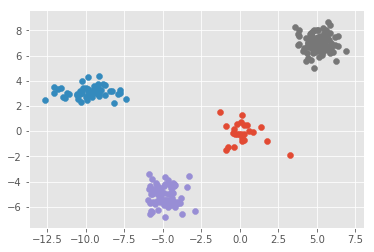

[[  0.12787842  -0.81981252]
 [  3.22434732  -1.92318016]
 [ -0.75355218  -1.24510182]
 [  0.12552077  -0.52954178]
 [  0.61236817  -0.02307627]
 [ -0.15627394  -0.26080996]
 [ -0.20214306   0.53254787]
 [ -0.92111134   0.42028178]
 [ -0.46543736  -0.12870294]
 [ -0.33823559  -0.21693882]
 [  1.38578807   0.30509762]
 [  0.28113704  -0.68476148]
 [  0.25994078  -0.24556499]
 [ -0.36101114  -1.25801696]
 [  0.11617973   1.31335617]
 [  0.25088841   0.47582311]
 [  0.86807476  -0.03918499]
 [  0.0480402    0.73357716]
 [ -0.39297432   0.19041901]
 [ -0.88751729  -1.4787442 ]
 [ -0.06940069  -0.22811341]
 [  0.45620896   0.51290256]
 [  0.09683215  -0.2562066 ]
 [  1.75960245  -0.80470124]
 [ -1.28186309   1.49718706]
 [-12.03524328   3.49299802]
 [ -7.7444137    3.02782607]
 [-11.5890172    3.44609724]
 [ -9.81768524   3.32595467]
 [-11.80235264   3.36204244]
 [-10.55645343   2.85043854]
 [-10.57812887   2.96816516]
 [-10.35679762   2.95553443]
 [-12.02709893   3.04420489]
 [ -9.9068867 

In [55]:
no_samples=250
params=[0.1,0.2,0.3,0.4]
means=[[0,0],[-10,3],[-5,-5],[5,7]]
cov=[[[0.5,0],[0,0.5]],[[1,0],[0,0.3]],[[0.5,0],[0,0.5]],[[0.5,0],[0,0.5]]]

points_array=[]
for i,param in enumerate(params):
    x,y=np.random.multivariate_normal(mean=means[i],cov=cov[i],size=int(no_samples*param)).T
    plt.scatter(x,y)
    points_array.append(np.array([x,y]).T)
    print(np.array([x,y]).shape)
plt.show()
    
points_array=np.vstack(points_array)   
print(points_array)        

In [56]:
no_classes=4
means=np.random.uniform(-10,10,[no_classes,2])


In [57]:
prev_means=0
epsillon=0.00001
while np.linalg.norm(means-prev_means)>epsillon:
    prev_means=means

    clusters_list=[[] for i in range(no_classes)]
    for point in points_array:
        clusters_list[np.argmin(np.array(np.array([np.linalg.norm(point-mean) for mean in means])))].append(point)
    means=[]    
    for i in range(no_classes):
        if len(clusters_list[i])!=0:
            means.append(np.mean(clusters_list[i],axis=0))
        else:
            means.append(np.random.uniform(-10,10,2))

    means=np.array(means)        
            
            
    

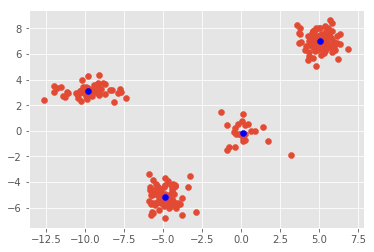

In [58]:
x,y=points_array.T
plt.scatter(x,y)
plt.scatter(*means.T,color="b")

plt.show()

In [59]:
print(clusters_list)

[[array([-12.03524328,   3.49299802]), array([-7.7444137 ,  3.02782607]), array([-11.5890172 ,   3.44609724]), array([-9.81768524,  3.32595467]), array([-11.80235264,   3.36204244]), array([-10.55645343,   2.85043854]), array([-10.57812887,   2.96816516]), array([-10.35679762,   2.95553443]), array([-12.02709893,   3.04420489]), array([-9.9068867 ,  2.49155227]), array([-10.29135821,   2.32963139]), array([-9.84340934,  4.29520827]), array([-9.15118394,  2.91217419]), array([-9.10941233,  2.82353084]), array([-9.95823832,  3.43039472]), array([-10.35794014,   3.14710865]), array([-9.18603483,  3.70459648]), array([-8.75399868,  2.85768792]), array([-9.11838888,  4.34426827]), array([-8.16100833,  2.22553761]), array([-9.44338451,  3.58515289]), array([-9.55058855,  2.74014538]), array([-9.16395526,  3.38957453]), array([-7.39245472,  2.56854075]), array([-7.75374284,  3.26439587]), array([-11.32951194,   2.66172611]), array([-9.01368448,  3.26691058]), array([-10.46471151,   2.53788436

In [92]:
cluster_covariances,cluster_means,cluster_fracs=np.array([]),np.array([]),np.array([])

for cluster in clusters_list:
    cluster_means=np.append(cluster_means,np.mean(np.array(cluster),axis=0))
    cluster_covariances=np.append(cluster_covariances,np.cov(np.array(cluster).T))
    cluster_fracs=np.append(cluster_fracs,len(cluster))
cluster_fracs/=np.sum(cluster_fracs)
cluster_covariances=np.reshape(cluster_covariances,[-1,2,2])
cluster_means=np.reshape(cluster_means,[-1,2])

In [93]:
print(cluster_covariances,cluster_means,cluster_fracs)

[[[ 1.41428113  0.03900988]
  [ 0.03900988  0.19689395]]

 [[ 0.41563813 -0.01752545]
  [-0.01752545  0.44746804]]

 [[ 0.44961061 -0.02881047]
  [-0.02881047  0.58454188]]

 [[ 0.87404384 -0.25491423]
  [-0.25491423  0.6787444 ]]] [[-9.81376324  3.1163262 ]
 [ 5.0626172   7.01556992]
 [-4.86758102 -5.13769124]
 [ 0.15133149 -0.16645063]] [ 0.2  0.4  0.3  0.1]


In [104]:
class Kmeans:
    def KNN(points_array,no_classes):  
        means=np.random.uniform(-10,10,[no_classes,2])


        prev_means=0
        epsillon=0.00001
        while np.linalg.norm(means-prev_means)>epsillon:
            prev_means=means

            clusters_list=[[] for i in range(no_classes)]
            for point in points_array:
                clusters_list[np.argmin(np.array(np.array([np.linalg.norm(point-mean) for mean in means])))].append(point)
            means=[]    
            for i in range(no_classes):
                if len(clusters_list[i])!=0:
                    means.append(np.mean(clusters_list[i],axis=0))
                else:
                    means.append(np.random.uniform(-10,10,2))

            means=np.array(means) 
        cluster_covariances,cluster_means,cluster_fracs=np.array([]),np.array([]),np.array([])

        for cluster in clusters_list:
            cluster_means=np.append(cluster_means,np.mean(np.array(cluster),axis=0))
            cluster_covariances=np.append(cluster_covariances,np.cov(np.array(cluster).T))
            cluster_fracs=np.append(cluster_fracs,len(cluster))
        cluster_fracs/=np.sum(cluster_fracs)
        cluster_covariances=np.reshape(cluster_covariances,[-1,2,2])
        cluster_means=np.reshape(cluster_means,[-1,2])
        return cluster_covariances,cluster_means,cluster_fracs

In [105]:
Kmeans.KNN(points_array,4)

(array([[[ 0.41563813, -0.01752545],
         [-0.01752545,  0.44746804]],
 
        [[ 0.64528658,  0.01887883],
         [ 0.01887883,  0.14246671]],
 
        [[ 0.43742999, -0.13378178],
         [-0.13378178,  0.24404007]],
 
        [[ 5.31869736,  4.64208828],
         [ 4.64208828,  5.28201099]]]), array([[  5.0626172 ,   7.01556992],
        [-10.70584865,   3.02285822],
        [ -8.84733737,   3.21758319],
        [ -3.61285289,  -3.89488109]]), array([ 0.4  ,  0.104,  0.096,  0.4  ]))